In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("../data/processed/cleaned_retail_data.csv")

df.head()
df.shape

(407664, 12)

In [3]:
total_revenue = df["Revenue"].sum()
total_revenue

8832003.274000002

In [5]:
total_orders = df["InvoiceID"].nunique()
total_customers = df["CustomerID"].nunique()

total_orders, total_customers

(19213, 4312)

In [7]:
aov = total_revenue / total_orders
aov

459.68892281267904

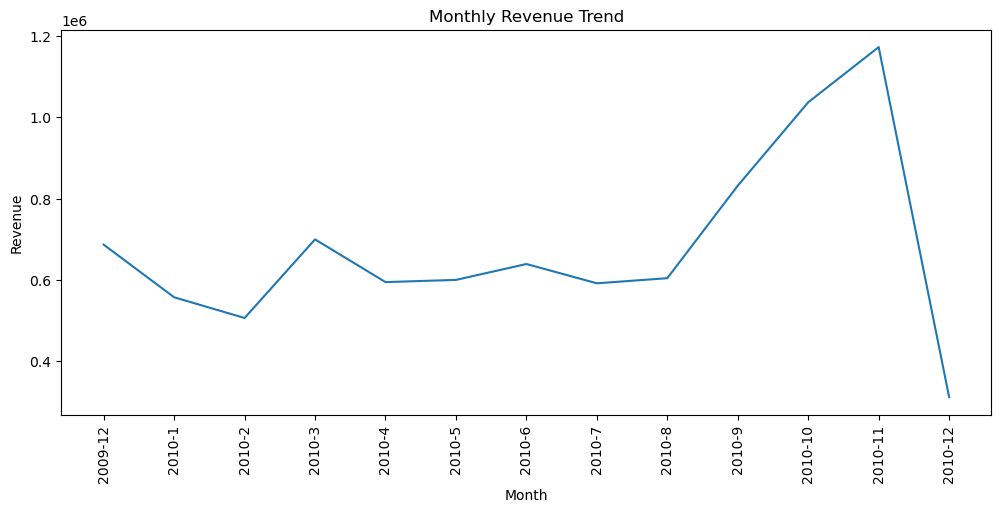

In [9]:
monthly_revenue = (
    df.groupby(["Year", "Month"])["Revenue"]
    .sum()
    .reset_index()
)

monthly_revenue["YearMonth"] = (
    monthly_revenue["Year"].astype(str) + "-" +
    monthly_revenue["Month"].astype(str)
)

plt.figure(figsize=(12,5))
plt.plot(monthly_revenue["YearMonth"], monthly_revenue["Revenue"])
plt.xticks(rotation=90)
plt.title("Monthly Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.show()

In [11]:
top_products = (
    df.groupby("ProductDescription")["Revenue"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

top_products

ProductDescription
WHITE HANGING HEART T-LIGHT HOLDER     151624.31
REGENCY CAKESTAND 3 TIER               143893.35
Manual                                  98560.64
ASSORTED COLOUR BIRD ORNAMENT           70493.83
JUMBO BAG RED RETROSPOT                 51759.30
POSTAGE                                 48741.08
ROTATING SILVER ANGELS T-LIGHT HLDR     40186.65
PAPER CHAIN KIT 50'S CHRISTMAS          36933.50
PARTY BUNTING                           35035.90
EDWARDIAN PARASOL NATURAL               34044.75
Name: Revenue, dtype: float64

In [13]:
country_revenue = (
    df.groupby("Country")["Revenue"]
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

country_revenue

Country
United Kingdom    7414755.963
EIRE               356085.210
Netherlands        268786.000
Germany            202395.321
France             146215.420
Sweden              53171.390
Denmark             50906.850
Spain               47601.420
Switzerland         43921.390
Australia           31446.800
Name: Revenue, dtype: float64